In [1]:
!date

Wed Jun  8 04:32:07 EDT 2022


In [2]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [19]:
import ants
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from helper_funcs import *
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('../Data/YeoAtlas/Yeo2011_7Networks_N1000.split_components.FSL_MNI152_2mm.Centroid_RAS.csv')
coords = df[['R','A','S']].values[1::,:]

In [6]:
lbls = df['Label Name'].values[1::]
lbls = [lbl.replace('7Networks_','') for lbl in lbls]

In [7]:
coords.shape

(51, 3)

In [10]:
n = 51
distmat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distmat[i,j] = pdist(np.vstack((coords[i,:],coords[j,:])))
distmat = distmat/distmat.max()

In [28]:
np.save(file='../Data/YeoAtlas/roi_distmat.npy',arr=distmat)

<AxesSubplot:>

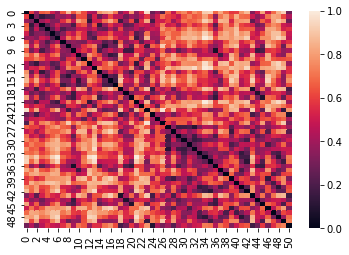

In [11]:
sns.heatmap(distmat)

In [25]:
Z = linkage(get_triu(distmat), method='complete', metric='euclidean', optimal_ordering=False)

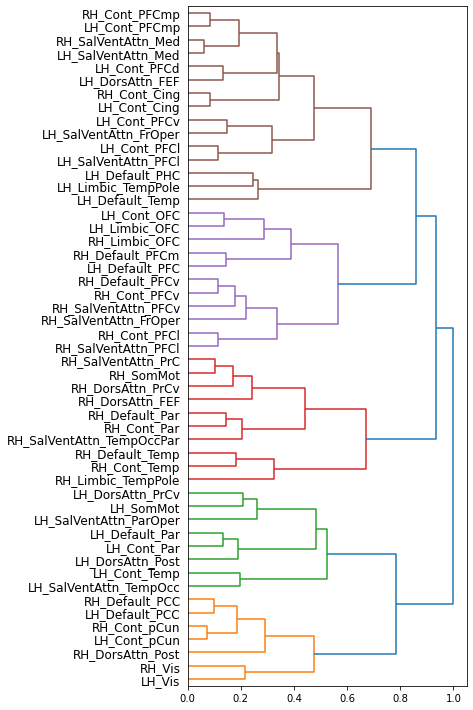

In [26]:
plt.figure(figsize=np.array((2,5))*2.5)
dendrogram(Z,labels=lbls,orientation='right');
plt.yticks(fontsize=12);